In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Logistic Regression

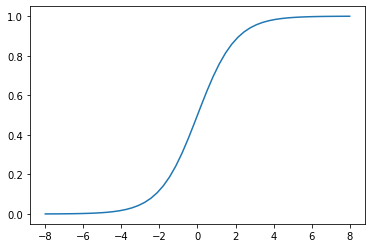

In [2]:
## logistic function
# This is the inverse of what we show in class
def logistic(x):
    return 1 / (1 + np.exp(-x))


x_space = np.linspace(-8, 8)
plt.plot(x_space, logistic(x_space))
plt.show()

In [3]:
# generate some random data
np.random.seed(5) # set seed
n_sample = 100
a = 3.0
b = -9.0

x = np.random.uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = np.random.binomial(n=1, p=q)

X, y = sm.add_constant(x), y

In [4]:
print('X\n', X[:5])
print('y\n', y[:30])

X
 [[1.         1.00656869]
 [1.         1.00885685]
 [1.         1.04947765]
 [1.         1.08156551]
 [1.         1.09173237]]
y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


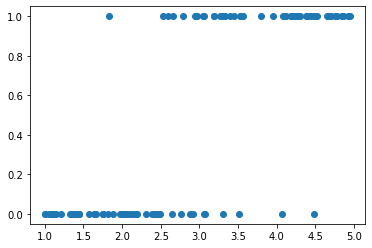

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
# Fit Logistic regression
model = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Wed, 04 May 2022   Deviance:                       63.016
Time:                        21:13:57   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

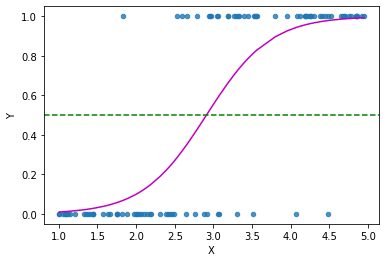

In [7]:
y_pred = model.predict(X) # this is the predicted y 

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(y=0.5, color='green', linestyle='--')
plt.show()

### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
y_true = y
y_pred_class = (y_pred > 0.5)
confusion_matrix(y_true, y_pred_class)

array([[42,  7],
       [ 5, 46]])

### ROC Curve

In [9]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y, y_pred) # y_pred is the prediction probability
# fpr = false positive rate = 1 - specificity
# tpr = true positive rate = recall = sensitivity
roc_auc = metrics.auc(fpr, tpr) # auc
print('auc', roc_auc)

auc 0.9415766306522608


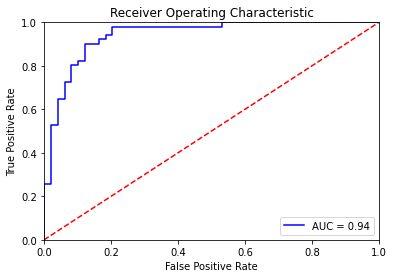

In [10]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # ROC curve is a plot of 1 - specificity and recall
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### F1 score

In [11]:
metrics.f1_score(y, y_pred_class) # y_pred_class is the predicted class

0.8846153846153846

## Other ways of Logistic Regression

### 1st way

In [12]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.315079
         Iterations 7


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.5453
Time:                        21:13:57   Log-Likelihood:                -31.508
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 3.520e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

### 2nd way

In [14]:
from sklearn.linear_model import LogisticRegression
# sklearn output
model = LogisticRegression(solver='lbfgs',fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

array([[-7.04458208,  2.42114067]])

# 2. Multinomial Logistic Regression

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

print('X\n', X[:10])
print('y\n', y)

X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


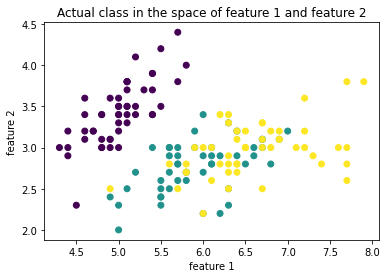

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Actual class in the space of feature 1 and feature 2')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [17]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = 1e9) 
# here C is a regularization term like we had for lasso and ridge, a smaller number means large regularization
lr.fit(X,y)

LogisticRegression(C=1000000000.0, multi_class='multinomial')

In [18]:
print('beta_k0\n',lr.intercept_)
print('beta_k1, beta_k2, beta_k3, beta_k4\n', lr.coef_) 
# In class we said that we only need (p+1)*(K-1) coefficietns. Here it is (p+1)*K. 
# If you see carefully, you will see that the last row is redundant given first two rows. 
# When solving numerically in computer, they need this extra row. 

beta_k0
 [  3.97750564  19.33027251 -23.30777816]
beta_k1, beta_k2, beta_k3, beta_k4
 [[  7.35271466  20.39778454 -30.26348739 -14.14337754]
 [ -2.44376492  -6.85843959  10.41704506  -2.07138612]
 [ -4.90894974 -13.53934495  19.84644233  16.21476366]]


In [19]:
# confusion matrix
y_pred = lr.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

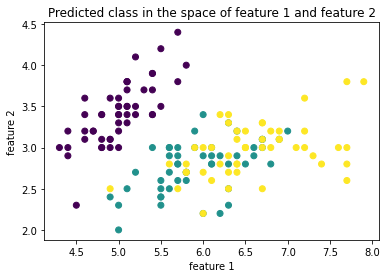

In [20]:
# a simple plot showing feature 1 and feature 2 and our prediction results
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Predicted class in the space of feature 1 and feature 2')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

# 3. Poisson Regression

## Poisson Distribution

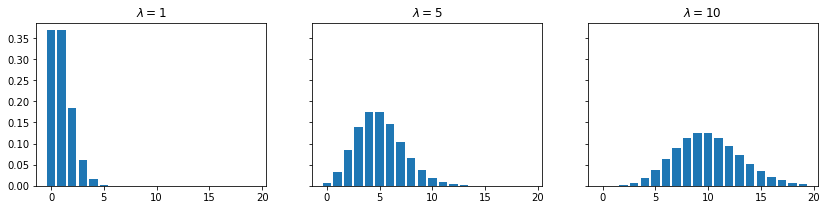

In [21]:
import scipy as sp
## Show how Poissson distribution looks for each lambda
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = sp.stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

plt.show()

## Poisson regression

In [22]:
# generate simulation data
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = np.random.uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = np.random.poisson(mu)

In [23]:
print(x[:5])
print(y[:5])

[1.88797268 4.48292922 1.82687662 4.67444363 2.95364476]
[ 2 11  7  5  3]


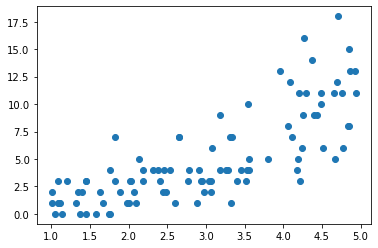

In [24]:
plt.scatter(x,y)
plt.show()

In [25]:
X, y = sm.add_constant(x), y
model = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Wed, 04 May 2022   Deviance:                       120.86
Time:                        21:13:58   Pearson chi2:                     115.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8754
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

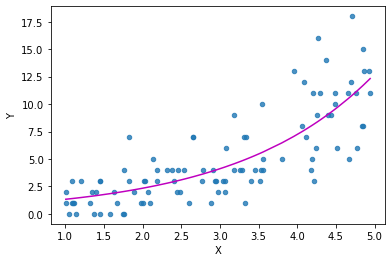

In [26]:
y_pred = model.predict(X)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 4. Probit Regression

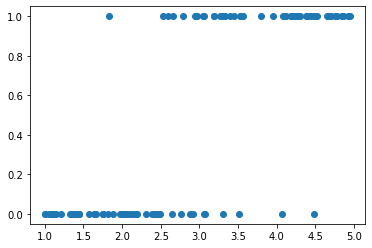

In [27]:
# generate some random data. Same as Logistic regression
np.random.seed(5) # set seed
n_sample = 100
a = 3.0
b = -9.0

x = np.random.uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = np.random.binomial(n=1, p=q)

plt.scatter(x,y)
plt.show()

In [28]:
X, y = sm.add_constant(x), y
model_logistic = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model_probit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.probit())).fit()
model_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.785
Date:                Wed, 04 May 2022   Deviance:                       63.570
Time:                        21:13:59   Pearson chi2:                     107.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5277
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8743      0.662     -5.855      0.000      -5.171      -2.577
x1             1.3184      0.219      6.030      0.000       0.890       1.747
==============================================================================
"""

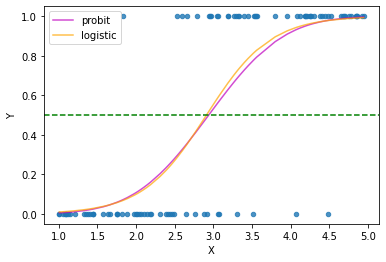

In [29]:
y_pred_probit = model_probit.predict(X) 
y_pred_logistic = model_logistic.predict(X)

idx = x.argsort()
x_ord, y_pred_ord_probit, y_pred_ord_logistic = x[idx], y_pred_probit[idx], y_pred_logistic[idx]
plt.plot(x_ord, y_pred_ord_probit, color='m', alpha=0.7, label='probit')
plt.plot(x_ord, y_pred_ord_logistic, color='orange', alpha=0.7, label='logistic')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(y=0.5, color='green', linestyle='--')
plt.legend()
plt.show()

# 5. Custom GLM

In [30]:
np.random.seed(5)
n_sample = 10000
a = 0.6
b = -0.4
sd = 0.8

x = np.random.uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = np.random.normal(mu, sd)

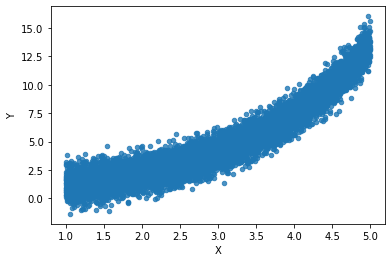

In [31]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [32]:
X,y = sm.add_constant(x),y

# Normal distribution + log link function
model = sm.GLM(y, X, family=sm.families.Gaussian(sm.families.links.log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.64737
Method:                          IRLS   Log-Likelihood:                -12014.
Date:                Wed, 04 May 2022   Deviance:                       6472.4
Time:                        21:13:59   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4039      0.007    -53.857      0.000      -0.419      -0.389
x1             0.6012      0.002    342.127      0.000       0.598       0.605
==============================================================================
"""

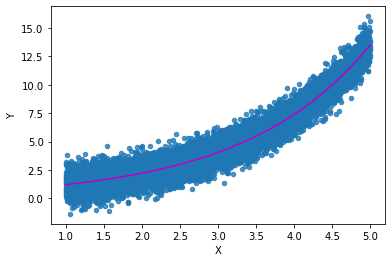

In [33]:
y_pred = model.predict(X)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()